In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import norm
from datetime import datetime
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind
import statsmodels
import statsmodels.formula.api as smf
import seaborn as sns

### **STAR dataset**

Preprocessing

In [2]:
# Load data - read everything as a string and then cast
star_df = pd.read_csv("/content/STAR_data.csv", sep=",", dtype=str)
star_df = star_df.rename(columns={"race": "ethnicity"})
star_df

,stdntid,gender,ethnicity,birthmonth,birthday,birthyear,gkclasstype,gkclasssize,gkschid,gksurban,...,g3schid,g3surban,g3tchid,g3freelunch,g3treadss,g3tmathss,g3tlangss,g3tlistss,Unnamed: 43,Unnamed: 44
0,10000,1,1,1,22,1979,NaN,NaN,NaN,NaN,...,170295,3,17029514,2,583,586,606,584,NaN,NaN
1,10001,1,1,2,20,1980,3,24,169229,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10002,2,2,7,21,1979,NaN,NaN,NaN,NaN,...,205492,2,20549213,NaN,577,570,600,603,NaN,NaN
3,10003,1,1,5,28,1980,NaN,NaN,NaN,NaN,...,257899,3,25789916,2,614,614,606,652,NaN,NaN
4,10004,2,2,1,2,1980,NaN,NaN,NaN,NaN,...,244796,1,24479613,1,616,624,627,597,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11596,21596,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,228606,3,22860615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11597,21597,2,1,8,8,1979,NaN,NaN,NaN,NaN,...,168214,3,16821411,1,NaN,NaN,NaN,NaN,NaN,NaN
11598,21598,2,2,4,18,1980,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11599,21599,2,1,3,27,1980,NaN,NaN,NaN,NaN,...,259915,3,25991515,2,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Fill na
star_df = star_df.fillna({"g1freelunch": 0, "g1surban": 0})
drop_star_l = ["g1tlistss", "g1treadss", "g1tmathss", "g1classtype",
"birthyear", "birthmonth", "birthday", "gender",
"ethnicity", "g1freelunch", "g1surban"]
star_df = star_df.dropna(subset=drop_star_l, how='any')
star_df

,stdntid,gender,ethnicity,birthmonth,birthday,birthyear,gkclasstype,gkclasssize,gkschid,gksurban,...,g3schid,g3surban,g3tchid,g3freelunch,g3treadss,g3tmathss,g3tlangss,g3tlistss,Unnamed: 43,Unnamed: 44
0,10000,1,1,1,22,1979,NaN,NaN,NaN,NaN,...,170295,3,17029514,2,583,586,606,584,NaN,NaN
3,10003,1,1,5,28,1980,NaN,NaN,NaN,NaN,...,257899,3,25789916,2,614,614,606,652,NaN,NaN
8,10008,2,2,4,23,1979,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10010,1,2,4,28,1980,NaN,NaN,NaN,NaN,...,244697,1,24469720,1,599,601,622,603,NaN,NaN
11,10011,2,2,6,2,1978,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11558,21558,2,1,3,21,1980,3,27,159171,3,...,159171,3,15917120,1,583,622,632,603,NaN,NaN
11560,21560,2,1,1,17,1980,1,17,215533,3,...,215533,3,21553320,1,575,576,611,610,NaN,NaN
11565,21565,2,1,9,22,1980,3,27,180344,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11570,21570,2,2,8,27,1980,3,20,244728,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Cast value types before processing
star_df["gender"] = star_df["gender"].astype(int)
star_df["ethnicity"] = star_df["ethnicity"].astype(int)
star_df["g1freelunch"] = star_df["g1freelunch"].astype(int)
star_df["g1surban"] = star_df["g1surban"].astype(int)
star_df["g1classtype"] = star_df["g1classtype"].astype(int)

In [5]:
# Keep only class type 1 and 2 (in the initial trial,
# 3 class types where attributed and the third one was big classes
# but with a teaching assistant)
star_df = star_df[~(star_df["g1classtype"] == 3)].reset_index(drop=True)

In [6]:
# Compute the outcome
star_df["Y"] = (star_df["g1tlistss"].astype(int)+ star_df["g1treadss"].astype(int)+ star_df["g1tmathss"].astype(int))/3

In [7]:
# Compute the treatment
star_df["T"] = star_df["g1classtype"].apply(lambda x: 0 if x == 2 else 1)

In [8]:
# Transform date to obtain age (Notice: if na --> date is NaT)
star_df["date"] = pd.to_datetime(star_df["birthyear"] + "/"
+ star_df["birthmonth"] + "/"
+ star_df["birthday"], yearfirst=True, errors="coerce")
star_df["age"] = (datetime(1985, 1, 1) - star_df["date"])

In [9]:
# Keep only covariates we consider predictive of the outcome
star_covariates_l = ["gender", "ethnicity", "age", "g1freelunch", "g1surban"]
star_df = star_df[["Y", "T"] + star_covariates_l]

In [10]:
# Map numerical to categorical
star_df["gender"] = star_df["gender"].apply(lambda x: "Girl" if x == 2 else "Boy").astype("category")
star_df["ethnicity"] = star_df["ethnicity"].map({1:"White", 2:"Black",3:"Asian", 4:"Hispanic",5:"Nat.American", 6:"Other"}).astype("category")
star_df["g1surban"] = star_df["g1surban"].map({1:"Inner.city", 2:"Suburban",
3:"Rural", 4:"Urban"}).astype("category")

In [11]:
star_df

,Y,T,gender,ethnicity,age,g1freelunch,g1surban
0,514.000000,0,Boy,White,1679 days,2,Rural
1,512.666667,0,Girl,Black,2080 days,1,Inner.city
2,470.333333,1,Girl,Black,1527 days,1,Suburban
3,500.666667,1,Girl,White,2178 days,2,Urban
4,516.333333,0,Boy,Black,2143 days,1,Inner.city
...,...,...,...,...,...,...,...
4210,539.000000,1,Boy,White,1652 days,1,Urban
4211,519.333333,0,Boy,Black,2484 days,2,Urban
4212,529.333333,0,Girl,White,1747 days,1,Rural
4213,500.666667,1,Girl,Black,1588 days,1,Inner.city


Question 1

Question 1-1

In [12]:
star_df.head()

,Y,T,gender,ethnicity,age,g1freelunch,g1surban
0,514.000000,0,Boy,White,1679 days,2,Rural
1,512.666667,0,Girl,Black,2080 days,1,Inner.city
2,470.333333,1,Girl,Black,1527 days,1,Suburban
3,500.666667,1,Girl,White,2178 days,2,Urban
4,516.333333,0,Boy,Black,2143 days,1,Inner.city


In [13]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4215 entries, 0 to 4214
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Y            4215 non-null   float64        
 1   T            4215 non-null   int64          
 2   gender       4215 non-null   category       
 3   ethnicity    4215 non-null   category       
 4   age          4215 non-null   timedelta64[ns]
 5   g1freelunch  4215 non-null   int64          
 6   g1surban     4215 non-null   category       
dtypes: category(3), float64(1), int64(2), timedelta64[ns](1)
memory usage: 144.7 KB


In [14]:
star_df.describe()

,Y,T,age,g1freelunch
count,4215.000000,4215.000000,4215,4215.000000
mean,540.095848,0.428233,1782 days 08:57:23.701067616,1.471886
std,39.267221,0.494881,169 days 21:06:04.200685578,0.534171
min,439.333333,0.000000,1143 days 00:00:00,0.000000
25%,511.333333,0.000000,1653 days 00:00:00,1.000000
50%,537.333333,0.000000,1760 days 00:00:00,1.000000
75%,566.000000,1.000000,1867 days 00:00:00,2.000000
max,670.666667,1.000000,2639 days 00:00:00,2.000000


In [15]:
star_df['age']=star_df['age'].astype('timedelta64[D]').astype('int')
star_df

,Y,T,gender,ethnicity,age,g1freelunch,g1surban
0,514.000000,0,Boy,White,1679,2,Rural
1,512.666667,0,Girl,Black,2080,1,Inner.city
2,470.333333,1,Girl,Black,1527,1,Suburban
3,500.666667,1,Girl,White,2178,2,Urban
4,516.333333,0,Boy,Black,2143,1,Inner.city
...,...,...,...,...,...,...,...
4210,539.000000,1,Boy,White,1652,1,Urban
4211,519.333333,0,Boy,Black,2484,2,Urban
4212,529.333333,0,Girl,White,1747,1,Rural
4213,500.666667,1,Girl,Black,1588,1,Inner.city


In [16]:
star_df.describe()

,Y,T,age,g1freelunch
count,4215.000000,4215.000000,4215.000000,4215.000000
mean,540.095848,0.428233,1782.373191,1.471886
std,39.267221,0.494881,169.879215,0.534171
min,439.333333,0.000000,1143.000000,0.000000
25%,511.333333,0.000000,1653.000000,1.000000
50%,537.333333,0.000000,1760.000000,1.000000
75%,566.000000,1.000000,1867.000000,2.000000
max,670.666667,1.000000,2639.000000,2.000000


Question 1-2

In [17]:
star_df0=star_df[star_df['T']==0]
star_df1=star_df[star_df['T']==1]

Basic influence of covariables

<ipython-input-18-56ae959d750e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(star_df0['age'])
<ipython-input-18-56ae959d750e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(star_df1['age'])


<Axes: xlabel='age', ylabel='Density'>

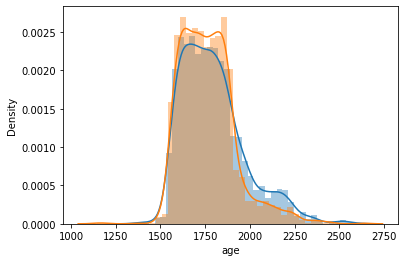

In [18]:
sns.distplot(star_df0['age'])
sns.distplot(star_df1['age'])

<ipython-input-19-5f99435ad082>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(star_df0['Y'])
<ipython-input-19-5f99435ad082>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(star_df1['Y'])


<Axes: xlabel='Y', ylabel='Density'>

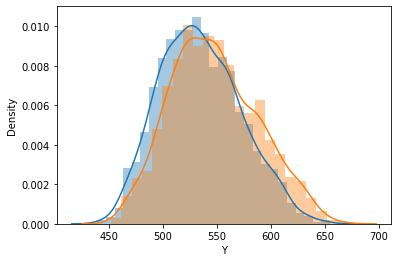

In [19]:
sns.distplot(star_df0['Y'])
sns.distplot(star_df1['Y'])

Question 2

Visualize covariate influence

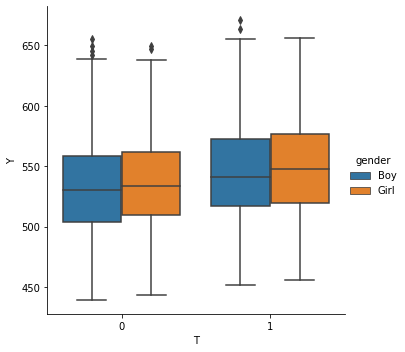

In [20]:
sns.catplot(data=star_df, x="T", y="Y", hue="gender", kind="box")

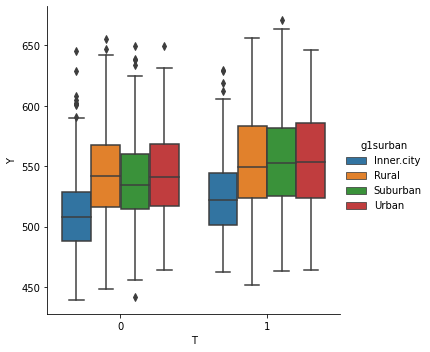

In [21]:
sns.catplot(data=star_df, x="T", y="Y", hue="g1surban", kind="box")

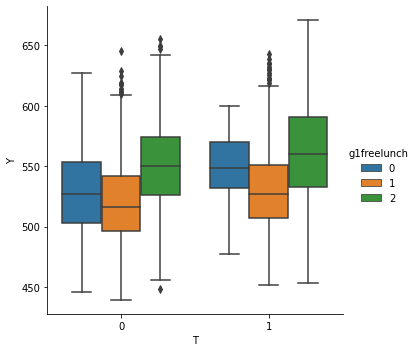

In [22]:
sns.catplot(data=star_df, x="T", y="Y", hue="g1freelunch", kind="box")

Question 3

https://pypi.org/project/tableone/

https://academic.oup.com/jamiaopen/article/1/1/26/5001910?login=false

https://cran.r-project.org/web/packages/tableone/vignettes/introduction.html#:~:text=What%20is%20tableone%3F,variables%20mixed%20within%20one%20table.

In [23]:
!pip install tableone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from tableone import TableOne, load_dataset

In [25]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4215 entries, 0 to 4214
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Y            4215 non-null   float64 
 1   T            4215 non-null   int64   
 2   gender       4215 non-null   category
 3   ethnicity    4215 non-null   category
 4   age          4215 non-null   int64   
 5   g1freelunch  4215 non-null   int64   
 6   g1surban     4215 non-null   category
dtypes: category(3), float64(1), int64(3)
memory usage: 144.7 KB


In [28]:
columns = ['g1freelunch','age','gender','ethnicity','g1surban']
categorical=['g1freelunch','gender','ethnicity','g1surban']
groupby = ['T']
labels={'Score': 'Y'}

In [29]:
mytable = TableOne(star_df, columns=columns, categorical=categorical, groupby=groupby ,rename=labels, htest_name=True, pval=True)
print(mytable.tabulate(tablefmt = "fancy_grid"))

╒════════════════════╤══════════════╤═══════════╤════════════════╤════════════════╤════════════════╤═══════════╤═══════════════════════════════════════════╕
│                    │              │ Missing   │ Overall        │ 0              │ 1              │ P-Value   │ Test                                      │
╞════════════════════╪══════════════╪═══════════╪════════════════╪════════════════╪════════════════╪═══════════╪═══════════════════════════════════════════╡
│ n                  │              │           │ 4215           │ 2410           │ 1805           │           │                                           │
├────────────────────┼──────────────┼───────────┼────────────────┼────────────────┼────────────────┼───────────┼───────────────────────────────────────────┤
│ g1freelunch, n (%) │ 0            │ 0         │ 76 (1.8)       │ 45 (1.9)       │ 31 (1.7)       │ 0.021     │ Chi-squared                               │
├────────────────────┼──────────────┼───────────┼─────────

Question 4

Question 4.1

DM estimator

Estimation of the ATE

In [30]:
star_df1['Y'].mean()-star_df0['Y'].mean()

12.814738911047016

CIs can be computed based on asymptotic variance

Question 4.2

We can also bootstrap to have CIs

In [ ]:
sample_ate_DM = []
for i in range(1000):
  y0 = random.sample(star_df0['Y'].values.tolist(), 1000)
  y1 = random.sample(star_df1['Y'].values.tolist(), 1000)
  avg = np.mean(y1)-np.mean(y0)
  sample_ate_DM.append(avg)

In [ ]:
np.quantile(sample_ate_DM, [0.025,0.975])

array([10.44648333, 15.31430833])